# South Weddington Park Transportation Barrier Map

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium

In [2]:
latlon = [34.14178391265484, -118.36612030903322] # Already Centered on a good park in District 5 according to our metrics
network_type = 'walk' # Change network type because I am focusing on transportation
trip_times = [5, 10, 15, 20] #in minutes, 
meters_per_minute = 75 # travel distance per minute for a car going 25 mph

In [3]:
G = ox.graph_from_point(latlon, network_type=network_type, dist = 2000) # standard

In [4]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [5]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [6]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13178875.111318758
4045439.0261936593
-13174037.344360068
4050275.4218531633


In [7]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13176456.227839414
4047857.224023411


In [8]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x) # Defining this for later, just as the park center

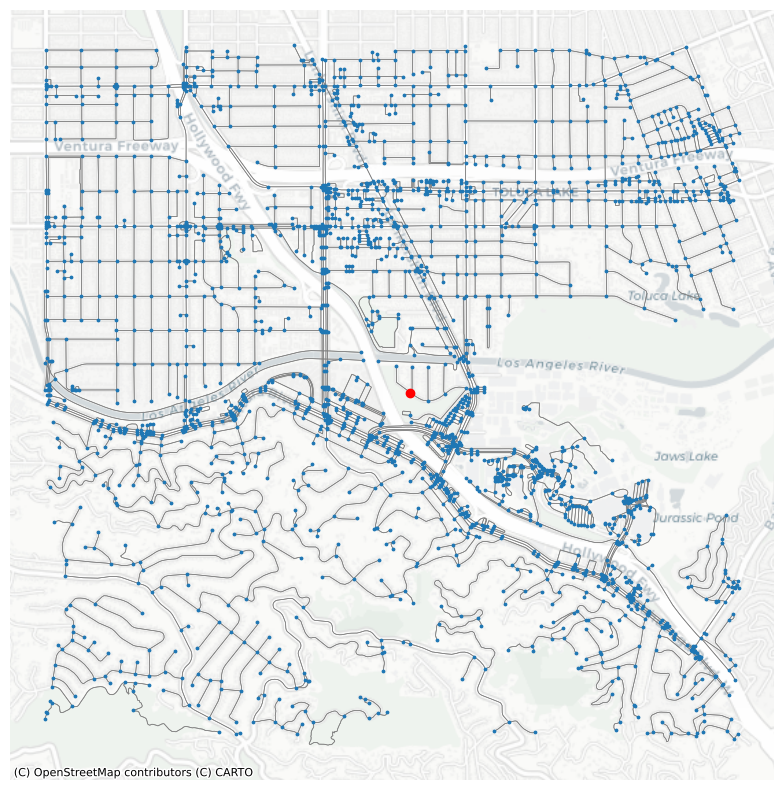

In [9]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5, # don't do more than 1
               edgecolor='gray', # line color
               zorder=10) #3D position (layers)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=3, 
               zorder=20) #this is higher so goes over the lines

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30) # top-most layers

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

# post note: that worked out well because the centroid is focused on the parking lot entrance to the park, where Walkrs would access it. 

In [10]:
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

In [11]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(15)

osmid                     name  \
u           v          key                                                    
122695807   1917629433 0                1210164312            Talofa Avenue   
7613170214  7613170213 0                 815056014                      NaN   
122897778   122897777  0                  13333526           Sancola Avenue   
122570195   5549373817 0                  13280223        Aqua Vista Street   
11235352096 7874859558 0    [405372209, 405372211]        Ventura Boulevard   
4821403980  1293326730 0                 405374495  Cahuenga Boulevard West   
4959831596  4959831538 0                 506214680                      NaN   
7524757366  2358086462 0                 209920811                      NaN   
4075762167  4876278365 0                 405370460     Lankershim Boulevard   
4418371556  4418455255 0                 444358095                      NaN   
123229343   8302107940 0                  13387226          Fruitland Drive   
122735157   122735153  0                  13305763         Wrightview Place   
6735128655  6735128657 0                 717126433                      NaN   
7613170214  7613170216 0                 815056014                      NaN   
6735835746  6735835747 0                 717197077                      NaN   

                                highway   length  walk_time  
u           v          key                                   
122695807   1917629433 0    residential   56.639   0.755187  
7613170214  7613170213 0        service   13.756   0.183413  
122897778   122897777  0    residential   88.889   1.185187  
122570195   5549373817 0    residential  210.567   2.807560  
11235352096 7874859558 0        primary   86.054   1.147387  
4821403980  1293326730 0        primary   50.590   0.674533  
4959831596  4959831538 0        service   97.185   1.295800  
7524757366  2358086462 0        service    8.420   0.112267  
4075762167  4876278365 0        primary   25.132   0.335093  
4418371556  4418455255 0        footway  398.641   5.315213  
123229343   8302107940 0    residential  195.926   2.612347  
122735157   122735153  0    residential   51.995   0.693267  
6735128655  6735128657 0        service   67.046   0.893947  
7613170214  7613170216 0        service    3.606   0.048080  
6735835746  6735835747 0        service   55.743   0.743240

## I get it now.
It took me a while to understand this but I get it. The Walk_time is a function of the length of the edges, not the time to get to the centroid. I have to say it again so I don't forget.

In [12]:
cmap = 'RdYlGn_r'

In [13]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#006837', '#b7e075', '#fdbf6f', '#a50026']


In [14]:
iso_colors.reverse()
iso_colors

['#a50026', '#fdbf6f', '#b7e075', '#006837']

In [15]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(5, '#a50026'), (10, '#fdbf6f'), (15, '#b7e075'), (20, '#006837')]

In [16]:
for time,color in list(time_color):
    print('The color for a '+str(time)+' minute Walk is ' + color) # change this a tiny bit for grammer

The color for a 5 minute Walk is #a50026
The color for a 10 minute Walk is #fdbf6f
The color for a 15 minute Walk is #b7e075
The color for a 20 minute Walk is #006837


In [17]:
time_color.reverse()
time_color

[(20, '#006837'), (15, '#b7e075'), (10, '#fdbf6f'), (5, '#a50026')]

In [18]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time,distance='time') #centernode is the park, defined earlier 

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' a minute Walk ' + color)
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = time
        gdf_nodes.loc[node,'color'] = color

There are 611 nodes within 20 a minute Walk #006837
There are 262 nodes within 15 a minute Walk #b7e075
There are 85 nodes within 10 a minute Walk #fdbf6f
There are 15 nodes within 5 a minute Walk #a50026


In [19]:
gdf_nodes.sample(10)

y             x          highway  street_count  \
osmid                                                                    
122940793    4.050260e+06 -1.317440e+07  traffic_signals             4   
122889869    4.050194e+06 -1.317499e+07              NaN             4   
122714926    4.046111e+06 -1.317853e+07   turning_circle             1   
4876278736   4.048683e+06 -1.317623e+07              NaN             1   
4418301958   4.047712e+06 -1.317706e+07              NaN             3   
10692455469  4.047755e+06 -1.317552e+07              NaN             3   
123193422    4.048583e+06 -1.317752e+07              NaN             3   
3694447088   4.049797e+06 -1.317460e+07              NaN             3   
6419907247   4.049196e+06 -1.317582e+07              NaN             4   
123436010    4.048680e+06 -1.317569e+07              NaN             4   

                    lon        lat                           geometry  time  \
osmid                                                                         
122940793   -118.347692  34.159654  POINT (-13174404.821 4050259.897)   NaN   
122889869   -118.352937  34.159168  POINT (-13174988.681 4050194.449)   NaN   
122714926   -118.384786  34.128810  POINT (-13178534.106 4046111.163)   NaN   
4876278736  -118.364112  34.147929  POINT (-13176232.665 4048682.601)  15.0   
4418301958  -118.371558  34.140715  POINT (-13177061.539 4047712.339)   NaN   
10692455469 -118.357732  34.141033  POINT (-13175522.413 4047755.123)   NaN   
123193422   -118.375708  34.147187  POINT (-13177523.548 4048582.768)   NaN   
3694447088  -118.349439  34.156211  POINT (-13174599.263 4049796.710)   NaN   
6419907247  -118.360393  34.151742  POINT (-13175818.657 4049195.527)  20.0   
123436010   -118.359276  34.147907  POINT (-13175694.302 4048679.602)  15.0   

               color  
osmid                 
122940793        nan  
122889869        nan  
122714926        nan  
4876278736   #b7e075  
4418301958       nan  
10692455469      nan  
123193422        nan  
3694447088       nan  
6419907247   #006837  
123436010    #b7e075

In [20]:
import numpy as np
gdf_nodes['color'] = gdf_nodes['color'].replace('nan', np.nan)
gdf_nodes = gdf_nodes.dropna(subset=['color'])
gdf_nodes

y             x          highway  street_count  \
osmid                                                                    
16298125     4.047481e+06 -1.317602e+07  traffic_signals             4   
7425256000   4.047493e+06 -1.317604e+07         crossing             4   
4757166089   4.047496e+06 -1.317601e+07  traffic_signals             4   
4757166091   4.047471e+06 -1.317600e+07         crossing             4   
2358091642   4.047305e+06 -1.317610e+07              NaN             3   
...                   ...           ...              ...           ...   
9371262948   4.048293e+06 -1.317696e+07              NaN             1   
11226835884  4.047890e+06 -1.317581e+07              NaN             1   
11252053298  4.048440e+06 -1.317579e+07              NaN             3   
11252053257  4.048319e+06 -1.317579e+07              NaN             3   
11252053258  4.048319e+06 -1.317578e+07              NaN             3   

                    lon        lat                           geometry  time  \
osmid                                                                         
16298125    -118.362202  34.138999  POINT (-13176020.078 4047481.488)  15.0   
7425256000  -118.362375  34.139083  POINT (-13176039.314 4047492.866)  15.0   
4757166089  -118.362144  34.139103  POINT (-13176013.622 4047495.543)  10.0   
4757166091  -118.362037  34.138920  POINT (-13176001.688 4047470.943)  15.0   
2358091642  -118.362918  34.137685  POINT (-13176099.761 4047304.815)  15.0   
...                 ...        ...                                ...   ...   
9371262948  -118.370634  34.145032  POINT (-13176958.757 4048292.932)  20.0   
11226835884 -118.360332  34.142037  POINT (-13175811.899 4047890.081)  10.0   
11252053298 -118.360140  34.146123  POINT (-13175790.571 4048439.651)  15.0   
11252053257 -118.360137  34.145224  POINT (-13175790.159 4048318.716)  20.0   
11252053258 -118.360014  34.145223  POINT (-13175776.478 4048318.622)  20.0   

               color  
osmid                 
16298125     #b7e075  
7425256000   #b7e075  
4757166089   #fdbf6f  
4757166091   #b7e075  
2358091642   #b7e075  
...              ...  
9371262948   #006837  
11226835884  #fdbf6f  
11252053298  #b7e075  
11252053257  #006837  
11252053258  #006837  

[611 rows x 9 columns]

In [21]:
isochrones = gdf_nodes.dissolve(by = "time")
isochrones
# make the polygons by the time intervals

geometry             y  \
time                                                                    
5.0   MULTIPOINT ((-13176550.649 4048069.950), (-131...  4.048038e+06   
10.0  MULTIPOINT ((-13176361.473 4048524.418), (-131...  4.047496e+06   
15.0  MULTIPOINT ((-13176931.295 4048460.688), (-131...  4.047481e+06   
20.0  MULTIPOINT ((-13177857.451 4047739.293), (-131...  4.046917e+06   

                 x          highway  street_count         lon        lat  \
time                                                                       
5.0  -1.317642e+07         crossing             1 -118.365833  34.143134   
10.0 -1.317601e+07  traffic_signals             4 -118.362144  34.139103   
15.0 -1.317602e+07  traffic_signals             4 -118.362202  34.138999   
20.0 -1.317591e+07             stop             4 -118.361195  34.134801   

        color  
time           
5.0   #a50026  
10.0  #fdbf6f  
15.0  #b7e075  
20.0  #006837

In [22]:
isochrones = isochrones.convex_hull.reset_index(name='geometry')
isochrones
# make the polygon outta the nodes

time                                           geometry
0   5.0  POLYGON ((-13176325.594 4047693.415, -13176550...
1  10.0  POLYGON ((-13176013.622 4047495.543, -13176034...
2  15.0  POLYGON ((-13176095.965 4047232.794, -13176139...
3  20.0  POLYGON ((-13175908.013 4046916.888, -13177857...

In [23]:
isochrones.sort_values(by='time', ascending=False,inplace=True)
isochrones.rename(columns={'time': 'Walk Time (min)'}, inplace=True)
isochrones

Walk Time (min)                                           geometry
3             20.0  POLYGON ((-13175908.013 4046916.888, -13177857...
2             15.0  POLYGON ((-13176095.965 4047232.794, -13176139...
1             10.0  POLYGON ((-13176013.622 4047495.543, -13176034...
0              5.0  POLYGON ((-13176325.594 4047693.415, -13176550...

# Add in other datasets

In [24]:
import pandas as pd 
import geopandas as gpd

In [25]:
Income = pd.read_excel(
    'Data/Income-Data.xlsx',
    dtype=
    {
        'GEO_ID':str,
    }
)
Income = Income.drop([0])
Income.info

<bound method DataFrame.info of       Geometry       GEO_ID  Less_10k  10k_to_14999  15k_to_19999  20k_24999  \
1     1400000U  06037101110        54           126            49         33   
2     1400000U  06037101122        88             0             7         42   
3     1400000U  06037101220        78            82            28        102   
4     1400000U  06037101221        76           107           118        148   
5     1400000U  06037101222       161           167            34         41   
...        ...          ...       ...           ...           ...        ...   
2494  1400000U  06037980038         0             0             0          0   
2495  1400000U  06037980039         0             0             0          0   
2496  1400000U  06037990100         0             0             0          0   
2497  1400000U  06037990200         0             0             0          0   
2498  1400000U  06037990300         0             0             0          0   

      2

In [26]:
Tracts = gpd.read_file('Data/tl_2021_06_tract.zip')

Tracts1 = Tracts[['GEOID','geometry']]
Tracts1.columns = ['GEO_ID',
'geometry']
Tracts1.head()

GEO_ID                                           geometry
0  06085504321  POLYGON ((-121.87556 37.39924, -121.87535 37.3...
1  06085504410  POLYGON ((-121.88886 37.40758, -121.88576 37.4...
2  06085507003  POLYGON ((-122.02489 37.21683, -122.02459 37.2...
3  06085507004  POLYGON ((-121.99304 37.22562, -121.99249 37.2...
4  06085502204  POLYGON ((-121.93167 37.29803, -121.92801 37.3...

In [27]:
District5 = pd.read_excel('Data/District5.xlsx',
    dtype =
    {
        'CT20':str,
    }
)
District5['GEO_ID'] = '06' + '037' + District5['CT20']
District5.head()

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0            1           1           1  101110  1011.10  5TH SUP. DISTRICT   
1            2           1           2  101122  1011.22  5TH SUP. DISTRICT   
2            3           1           3  101220  1012.20  5TH SUP. DISTRICT   
3            4           1           4  101221  1012.21  5TH SUP. DISTRICT   
4            5           1           5  101222  1012.22  5TH SUP. DISTRICT   

                       SUP_NAME  DIST_SUP CITYNAME_ALF NAME_1  \
0  5TH DISTRICT: KATHRYN BARGER         5  LOS ANGELES    NaN   
1  5TH DISTRICT: KATHRYN BARGER         5  LOS ANGELES    NaN   
2  5TH DISTRICT: KATHRYN BARGER         5  LOS ANGELES    NaN   
3  5TH DISTRICT: KATHRYN BARGER         5  LOS ANGELES    NaN   
4  5TH DISTRICT: KATHRYN BARGER         5  LOS ANGELES    NaN   

        JURISDICTION  AREA_NUM                          AREA_NAME  \
0  INCORPORATED CITY         3  San Fernando Valley Planning Area   
1  INCORPORATED CITY         3  San Fernando Valley Planning Area   
2  INCORPORATED CITY         3  San Fernando Valley Planning Area   
3  INCORPORATED CITY         3  San Fernando Valley Planning Area   
4  INCORPORATED CITY         3  San Fernando Valley Planning Area   

    Shape__Area  Shape__Length       GEO_ID  
0  1.676519e+06    5565.411341  06037101110  
1  3.881001e+06   11695.304277  06037101122  
2  1.025452e+06    4688.607147  06037101220  
3  5.197057e+05    3378.824327  06037101221  
4  4.350619e+05    3685.233312  06037101222

In [28]:
District5Tracts=Tracts1.merge(District5,on="GEO_ID")
District5Tracts.head()

GEO_ID                                           geometry  \
0  06037311801  POLYGON ((-118.31214 34.16444, -118.31067 34.1...   
1  06037463800  POLYGON ((-118.18604 34.13383, -118.18553 34.1...   
2  06037463900  POLYGON ((-118.16805 34.12392, -118.16778 34.1...   
3  06037464000  POLYGON ((-118.15038 34.13577, -118.14957 34.1...   
4  06037464200  POLYGON ((-118.10850 34.13427, -118.10850 34.1...   

   OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0         1171           1        1171  311801  3118.01  5TH SUP. DISTRICT   
1         1500           2        1500  463800  4638.00  5TH SUP. DISTRICT   
2         1501           2        1501  463900  4639.00  5TH SUP. DISTRICT   
3         1502           1        1502  464000  4640.00  5TH SUP. DISTRICT   
4         1505           2        1505  464200  4642.00  5TH SUP. DISTRICT   

                       SUP_NAME  DIST_SUP CITYNAME_ALF NAME_1  \
0  5TH DISTRICT: KATHRYN BARGER         5      BURBANK    NaN   
1  5TH DISTRICT: KATHRYN BARGER         5     PASADENA    NaN   
2  5TH DISTRICT: KATHRYN BARGER         5     PASADENA    NaN   
3  5TH DISTRICT: KATHRYN BARGER         5     PASADENA    NaN   
4  5TH DISTRICT: KATHRYN BARGER         5   SAN MARINO    NaN   

        JURISDICTION  AREA_NUM                              AREA_NAME  \
0  INCORPORATED CITY         3      San Fernando Valley Planning Area   
1  INCORPORATED CITY         7  West San Gabriel Valley Planning Area   
2  INCORPORATED CITY         7  West San Gabriel Valley Planning Area   
3  INCORPORATED CITY         7  West San Gabriel Valley Planning Area   
4  INCORPORATED CITY         7  West San Gabriel Valley Planning Area   

    Shape__Area  Shape__Length  
0  8.876761e+05    4455.827633  
1  4.195680e+06   11089.630952  
2  2.753484e+06    7117.630267  
3  4.603528e+06    9832.312127  
4  5.062513e+06    9596.189256

In [29]:
District5TractsGEO=District5Tracts.merge(Income,on="GEO_ID")
District5TractsGEO.head()

GEO_ID                                           geometry  \
0  06037311801  POLYGON ((-118.31214 34.16444, -118.31067 34.1...   
1  06037463800  POLYGON ((-118.18604 34.13383, -118.18553 34.1...   
2  06037463900  POLYGON ((-118.16805 34.12392, -118.16778 34.1...   
3  06037464000  POLYGON ((-118.15038 34.13577, -118.14957 34.1...   
4  06037464200  POLYGON ((-118.10850 34.13427, -118.10850 34.1...   

   OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0         1171           1        1171  311801  3118.01  5TH SUP. DISTRICT   
1         1500           2        1500  463800  4638.00  5TH SUP. DISTRICT   
2         1501           2        1501  463900  4639.00  5TH SUP. DISTRICT   
3         1502           1        1502  464000  4640.00  5TH SUP. DISTRICT   
4         1505           2        1505  464200  4642.00  5TH SUP. DISTRICT   

                       SUP_NAME  DIST_SUP  ... 35k_39999 40k_to_44999  \
0  5TH DISTRICT: KATHRYN BARGER         5  ...        77           95   
1  5TH DISTRICT: KATHRYN BARGER         5  ...        24           12   
2  5TH DISTRICT: KATHRYN BARGER         5  ...        43           18   
3  5TH DISTRICT: KATHRYN BARGER         5  ...        10           10   
4  5TH DISTRICT: KATHRYN BARGER         5  ...        53           56   

  45k_to_49999  50k_to_59999 60k_to_74999  75k_to_99999  100k_to_124999  \
0           77            96           94           124             129   
1           10            34           48           125              86   
2            0            52          118           144             208   
3           25           120          300           198             221   
4           41            65           90           262             100   

  125k_to_149999  150k_to_199999  200k_plus  
0            108              86         47  
1             71             271        650  
2            139             166        362  
3            259             303        647  
4            116             214        754  

[5 rows x 34 columns]

In [30]:
VulnerableCar = pd.read_excel('Data/Transport.xlsx',
 dtype =
    {
        'TRACT':str,
    }
)
VulnerableCar['GEO_ID'] = '06' + '037' + VulnerableCar['TRACT']
VulnerableCar.head()

TRACT  D2_Transp    atmbl_p       GEO_ID
0  101110          2  53.753368  06037101110
1  101122          1  98.986270  06037101122
2  101210          1  28.538432  06037101210
3  101220          2  16.745798  06037101220
4  101300          2  59.707430  06037101300

In [31]:
District5VulnerableCar=District5TractsGEO.merge(VulnerableCar,on="GEO_ID")
District5VulnerableCar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GEO_ID          341 non-null    object  
 1   geometry        341 non-null    geometry
 2   OBJECTID_12     341 non-null    int64   
 3   Join_Count      341 non-null    int64   
 4   TARGET_FID      341 non-null    int64   
 5   CT20            341 non-null    object  
 6   LABEL           341 non-null    float64 
 7   NAME            341 non-null    object  
 8   SUP_NAME        341 non-null    object  
 9   DIST_SUP        341 non-null    int64   
 10  CITYNAME_ALF    294 non-null    object  
 11  NAME_1          54 non-null     object  
 12  JURISDICTION    341 non-null    object  
 13  AREA_NUM        341 non-null    int64   
 14  AREA_NAME       341 non-null    object  
 15  Shape__Area     341 non-null    float64 
 16  Shape__Length   341 non-null    float64 
 17  Geometry

In [32]:
m = folium.Map(location=latlon,zoom_start=13, tiles='Cartodb Positron')

# Map it based on D2_Transp
folium.Choropleth(
    geo_data=District5VulnerableCar,
    data=District5VulnerableCar,
    key_on='feature.properties.GEO_ID',
    columns=['GEO_ID','D2_Transp'],
    fill_color='YlOrRd',
    line_weight=0.1, 
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)  

#Add popups
popup = folium.GeoJsonPopup(
    fields=['D2_Transp','CITYNAME_ALF','GEO_ID', 'NAME',],
    aliases=['Number of Transportation Barriers:','City:', 'Census Tract:', 'District:',],
    localize=True,
    sticky=False,
    labels=True,
    style="border:none;", #
)

folium.GeoJson(
    District5VulnerableCar,
    popup=popup,
).add_to(m)

isochrones.explore(m=m,column='Walk Time (min)',color='iso_colors',cmap=cmap,opacity=0.4,categorical=True)

gdf_nodes.explore(m=m,column='time')

title_html = '<h3 align="center" style="font-size:20px"><b>Transportation Barriers overlayed with a 20-minute walking radius around South Weddington Park in District 5</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

m

In [33]:
m.save('SouthWeddingtonParkTransp.html')